In [1]:
import glob
import os

import matplotlib.pyplot as plt
import matplotlib as mpl
import netCDF4 as nc
import numpy as np

from scipy.interpolate import RectBivariateSpline

%matplotlib inline

In [2]:
pwd

'C:\\Alissa\\ENSG\\ING2\\STAGE\\Dev\\satellite-data-pipeline\\asip_v2'

In [3]:
%cd "D:/training"

D:\training


In [4]:
def form_of_ice(stage):
    """
    Gives back the index the concentration or 1 should be on. Each index corresponds to a particular ice type 
    (0: Young ice; 1: First Year ice; 2: Multi year ice ; 3: Ice free)
    --- 
    input : stage : stage of development : integer
    ---
    output : index : integer
    """
    index_=0
    #if stage ==0:
        #index_ = 0
        #print('ice_free')
    if stage!=-9:
        if stage in range(81,86):
            #print('Young ice')
            index_=1
        if stage in range(86,94):
            #print('First year ice')
            index_=2
        if stage in range(95,98):
            #print('multiyear ice')
            index_=3
    return index_
    

FIRST METHOD

In [5]:
def one_hot_m1(ct,ca,sa,cb,sb,fb,cc,sc):
    L=[ct,ca,sa,cb,sb,fb,cc,sc]
    index = np.argmax(L)
    #print(index)
    if index ==0:
        result = [1,0,0,0]
    else :
        #print([sa,sb,sc])
        #print('bibi',[sa,sb,sc][index])
        index2 = form_of_ice([sa,sb,sc][index])
        #print(index2)
        result = [0,0,0,0]
        result[index2]=1
    return result

In [6]:
def one_hot_m2(ct,ca,sa,cb,sb,fb,cc,sc):
    result = [0,0,0,0]
    result[0] = int(ct)/100
    for si, ci in zip([sa,sb,sc], [ca,cb,cc]):
        #print(si)
        index_2 = form_of_ice(si)
        result[index_2] += ci/100
    return result

In [7]:
file = '20180404T205505_S1B_AMSR2_Icechart-Greenland-CentralWest.nc'

In [8]:
stp=20

In [23]:
n,p= ic.shape

In [24]:
mat= np.zeros((n,p,4))+np.nan

In [25]:
mat.shape

(500, 530, 4)

In [27]:
ds = nc.Dataset(file)
n,p=ds['nersc_sar_secondary'].shape
sar2 = ds['nersc_sar_secondary'][::stp, ::stp]
ic = ds['polygon_icechart'][::stp, ::stp]

n,p= ic.shape

en_values_array=np.zeros((n,p,4))+np.nan
mat= np.zeros(ic.shape)+np.nan

map_id_to_variable_values=dict()
for id_and_corresponding_variable_values in ds['polygon_codes'][1:]:
    id_val_splitted = id_and_corresponding_variable_values.split(";")
    #print(id_val_splitted)
    [ct, ca, sa, fa, cb, sb, fb, cc, sc] = list(map(int, id_val_splitted[1:10]))
    result = one_hot_m1(ct,ca,sa,cb,sb,fb,cc,sc)
    map_id_to_variable_values.update({int(id_val_splitted[0]): result})
#     map_id_to_variable_values.update({int(id_val_splitted[0]): id_val_splitted[1:]})
    print("----- input \n",ct,ca,sa,cb,sb,fb,cc,sc, "\n-----output \n",result,"\n")    

----- input 
 92 -9 87 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 30 91 70 87 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 10 91 60 87 -9 30 83 
-----output 
 [1, 0, 0, 0] 

----- input 
 50 20 93 20 91 5 10 87 
-----output 
 [0, 0, 1, 0] 

----- input 
 92 30 91 70 87 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 80 30 91 30 87 4 20 87 
-----output 
 [0, 0, 1, 0] 

----- input 
 80 20 93 20 91 5 40 87 
-----output 
 [0, 0, 1, 0] 

----- input 
 92 -9 91 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 80 91 20 87 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 30 10 87 10 83 2 10 82 
-----output 
 [0, 1, 0, 0] 

----- input 
 91 40 93 50 91 6 10 87 
-----output 
 [0, 0, 1, 0] 

----- input 
 91 60 93 40 91 6 -9 -9 
-----output 
 [1, 0, 0, 0] 

----- input 
 92 -9 91 -9 -9 -9 -9 -9 
-----output 
 [1, 0, 0, 0] 



In [28]:
map_id_to_variable_values

{41: [1, 0, 0, 0],
 42: [1, 0, 0, 0],
 43: [1, 0, 0, 0],
 44: [0, 0, 1, 0],
 45: [1, 0, 0, 0],
 46: [0, 0, 1, 0],
 47: [0, 0, 1, 0],
 48: [1, 0, 0, 0],
 49: [1, 0, 0, 0],
 50: [0, 1, 0, 0],
 51: [0, 0, 1, 0],
 52: [1, 0, 0, 0],
 53: [1, 0, 0, 0]}

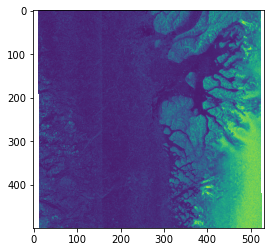

In [29]:
plt.imshow(sar2)

In [34]:
for id_value, variable_belong_to_id in map_id_to_variable_values.items():
        # each loop changes all locations of values_array (that have the very
        # 'id_value') to its corresponding value inside 'variable_belong_to_id'
#         ct = int(variable_belong_to_id[0])
#         ca = int(variable_belong_to_id[1])
#         sa = int(variable_belong_to_id[2])
#         fa = int(variable_belong_to_id[3])
#         cb = int(variable_belong_to_id[4])
#         sb = int(variable_belong_to_id[5])
#         fb = int(variable_belong_to_id[6])
#         cc = int(variable_belong_to_id[7])
#         sc = int(variable_belong_to_id[8])
#         result = one_hot_m2(ct,ca,sa,cb,sb,fb,cc,sc)
#         print("----- input \n",ct,ca,sa,cb,sb,fb,cc,sc, "\n-----output \n",result,"\n")
        print(en_values_array[ic == id_value, :].shape)
        en_values_array[ic == id_value, :] = np.byte(np.array(variable_belong_to_id))

(46, 4)
(456, 4)
(1482, 4)
(1831, 4)
(381, 4)
(530, 4)
(4903, 4)
(4671, 4)
(4029, 4)
(1049, 4)
(5089, 4)
(46533, 4)
(7010, 4)


In [35]:
en_values_array.shape

(500, 530, 4)

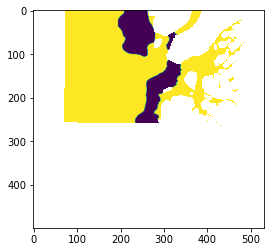

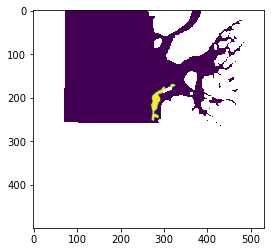

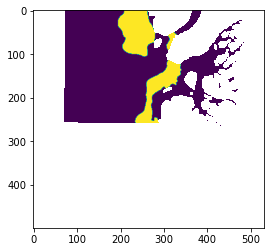

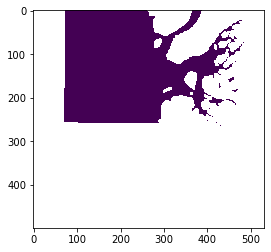

In [40]:
for i in range(4):
    plt.imshow(en_values_array[:,:,i])
    plt.show()

In [25]:
round(2.46667777, 3)

2.467

In [24]:
ct = 92
ca = 30
sa = 91
fa = 8
cb = 70
sb = 87
fb = -9
cc = -9 
sc = -9

In [70]:
np.argmax(ct,ca,sa,cb,sb,fb,cc,sc)

TypeError: _argmax_dispatcher() takes from 1 to 3 positional arguments but 8 were given

In [25]:
result = [0,0,0,0]
result[0] = int(ct)/100
for si, ci in zip([sa,sb,sc], [ca,cb,cc]):
    #print(si)
    index_2 = form_of_ice(si)
    print("bibi",index_2)
    result[index_2] += int(ci)/100

bibi 2
bibi 2
bibi 0


In [26]:
one_hot_m2(ct,ca,sa,cb,sb,fb,cc,sc)

bibi 2
bibi 2
bibi 0


[0.8300000000000001, 0, 1.0, 0]

In [27]:
result

[0.8300000000000001, 0, 1.0, 0]

In [29]:
one_hot_m2(ct,ca,sa,cb,sb,fb,cc,sc)

bibi 2
bibi 2
bibi 0


[0.8300000000000001, 0, 1.0, 0]

In [9]:
map_id_to_variable_values

{41: ['92',
  '-9',
  '87',
  '8',
  '-9',
  '-9',
  '-9',
  '-9',
  '-9',
  '-9',
  '98',
  '-9',
  '-9',
  'I'],
 42: ['92',
  '30',
  '91',
  '8',
  '70',
  '87',
  '-9',
  '-9',
  '-9',
  '-9',
  '-9',
  '-9',
  '-9',
  'I'],
 43: ['92',
  '10',
  '91',
  '8',
  '60',
  '87',
  '-9',
  '30',
  '83',
  '-9',
  '98',
  '-9',
  '-9',
  'I'],
 44: ['50',
  '20',
  '93',
  '5',
  '20',
  '91',
  '5',
  '10',
  '87',
  '4',
  '98',
  '-9',
  '-9',
  'I'],
 45: ['92',
  '30',
  '91',
  '8',
  '70',
  '87',
  '-9',
  '-9',
  '-9',
  '-9',
  '-9',
  '-9',
  '-9',
  'I'],
 46: ['80',
  '30',
  '91',
  '5',
  '30',
  '87',
  '4',
  '20',
  '87',
  '3',
  '-9',
  '-9',
  '-9',
  'I'],
 47: ['80',
  '20',
  '93',
  '6',
  '20',
  '91',
  '5',
  '40',
  '87',
  '4',
  '-9',
  '-9',
  '-9',
  'I'],
 48: ['92',
  '-9',
  '91',
  '8',
  '-9',
  '-9',
  '-9',
  '-9',
  '-9',
  '-9',
  '98',
  '-9',
  '-9',
  'I'],
 49: ['92',
  '80',
  '91',
  '8',
  '20',
  '87',
  '-9',
  '-9',
  '-9',
  '-9',
  '

In [ ]:
one_hot(ct,ca,sa,cb,sb,fb,cc,sc,2)

METHOD 1

METHOD 2

In [ ]:
ct = 20
ca = 10
sa = 95
fa = 0
cb = 10
sb = 87
fb = 0
cc = 0 
sc = 0

In [ ]:
ifiles = sorted(glob.glob('*.nc'))
stp = 20

dir_ = "D:/training/reconstructs_folder"

for i in range(len(ifiles)):
    print(i)
    file = ifiles[i]
    one_hot_mat = one_hot_method1(file)
    print(np.unique(one_hot_mat[:,:,0]))
    plt.imshow(one_hot_mat[:,:,1])
    plt.colorbar()
    plt.show()

SECOND METHOD

In [ ]:
def one_hot_method2(file):
    
    
    """
    Creates for a file a matrix corresponding to one-hot encoding using method 2 (concentrations)
    ---
    input: file : netCDF4 dataset archive
    ---
    output : classif_values_array : numpy.array one-hot encoded
    """
        
    ds = nc.Dataset(file)
    n,p=ds['nersc_sar_secondary'].shape
    sar2 = ds['nersc_sar_secondary'][::stp, ::stp]
    ic = ds['polygon_icechart'][::stp, ::stp]
    
    en_values_array=np.zeros(ic.shape)+np.nan
    mat= np.zeros(ic.shape)+np.nan
    
    map_id_to_variable_values=dict()
    for id_and_corresponding_variable_values in ds['polygon_codes'][1:]:
        id_val_splitted = id_and_corresponding_variable_values.split(";")
        map_id_to_variable_values.update({int(id_val_splitted[0]): id_val_splitted[1:]})

    for id_value, variable_belong_to_id in map_id_to_variable_values.items():
        # each loop changes all locations of values_array (that have the very
        # 'id_value') to its corresponding value inside 'variable_belong_to_id'
        en_values_array[ic == id_value] = np.float(variable_belong_to_id[0])
        
    for i in range(1,9):
        if i!=3 or i!=6:
            for id_value, variable_belong_to_id in map_id_to_variable_values.items():
        # each loop changes all locations of values_array (that have the very
        # 'id_value') to its corresponding value inside 'variable_belong_to_id'
                mat[ic == id_value] = np.float(variable_belong_to_id[i])

            en_values_array = np.dstack((en_values_array,mat))
            
    mat = np.dstack((en_values_array[:,:,:3],en_values_array[:,:,4:6],en_values_array[:,:,7:]))       
    n,p,q= mat.shape
    classif_values_array = np.zeros((n,p,4))
    
    for i in range(n):
        for j in range(p):
            index=0
            ca = mat[i,j,1]
            sa = mat[i,j,2]
            cb = mat[i,j,3]
            sb = mat[i,j,4]
            cc = mat[i,j,5]
            sc = mat[i,j,6]
            
            values_array = np.array([[ca,cb,cc],[sa,sb,sc]])
            
            for k in range(len(values_array)+1):
                #print(i)
                index = form_of_ice(values_array[1,k])
                classif_values_array[i,j,index]+= values_array[0,k]/100
                #print(index)
            classif_values_array[i,j,3]= 1- sum(classif_values_array[i,j,0:2])
            
    return classif_values_array

In [ ]:
ifiles = sorted(glob.glob('*.nc'))
stp = 20

dir_ = "D:/training/reconstructs_folder"

for i in range(len(ifiles)):
    print(i)
    file = ifiles[i]
    one_hot_mat2 = one_hot_method2(file)
    print(np.unique(one_hot_mat2[:,:,0]))
    plt.imshow(one_hot_mat2[:,:,0])
    plt.show()

In [15]:
def one_hot_method1(file):
    """
    Creates for a file a matrix corresponding to one-hot encoding using method 1 (1s and 0s)
    ---
    input: file : netCDF4 dataset archive
    ---
    output : classif_values_array : numpy.array one-hot encoded
    """
    
    ds = nc.Dataset(file)
    n,p=ds['nersc_sar_secondary'].shape
    sar2 = ds['nersc_sar_secondary'][::stp, ::stp]
    ic = ds['polygon_icechart'][::stp, ::stp]
    
    en_values_array=np.zeros(ic.shape)+np.nan
    mat= np.zeros(ic.shape)+np.nan
    
    map_id_to_variable_values=dict()
    for id_and_corresponding_variable_values in ds['polygon_codes'][1:]:
        id_val_splitted = id_and_corresponding_variable_values.split(";")
        map_id_to_variable_values.update({int(id_val_splitted[0]): id_val_splitted[1:]})
        

    for id_value, variable_belong_to_id in map_id_to_variable_values.items():
        # each loop changes all locations of values_array (that have the very
        # 'id_value') to its corresponding value inside 'variable_belong_to_id'
        en_values_array[ic == id_value] = np.float(variable_belong_to_id[0])
    
    for i in range(1,9):
        if i!=3 or i!=6:
            for id_value, variable_belong_to_id in map_id_to_variable_values.items():
        # each loop changes all locations of values_array (that have the very
        # 'id_value') to its corresponding value inside 'variable_belong_to_id'
                mat[ic == id_value] = np.float(variable_belong_to_id[i])

            en_values_array = np.dstack((en_values_array,mat))
            
    mat = np.dstack((en_values_array[:,:,:3],en_values_array[:,:,4:6],en_values_array[:,:,7:]))       
    n,p,q= mat.shape
    classif_values_array = np.zeros((n,p,4))
    
    for i in range(n):
        for j in range(p):
            index=0
            ca = mat[i,j,1]
            sa = mat[i,j,2]
            cb = mat[i,j,3]
            sb = mat[i,j,4]
            cc = mat[i,j,5]
            sc = mat[i,j,6]

            if max(ca,cb,cc)==ca:
                #print(sa)
                index= form_of_ice(sa)
            if max(ca,cb,cc)==cb:
                #print(sb)
                index = form_of_ice(sb)
            if max(ca,cb,cc)==cc:
                #print(sc)
                index = form_of_ice(sc)
            classif_values_array[i,j,index] = 1
            
    return classif_values_array